# Wavediagrams for FYS4220

Requires:
- pip install schemdraw
- sudo port install librsvg (converts svg to png from command line)

Should find a way to convert directly to png from python

In [1]:
import schemdraw
from schemdraw import logic
from schemdraw import flow
import schemdraw.elements as elm
import os
import plantuml
import graphviz

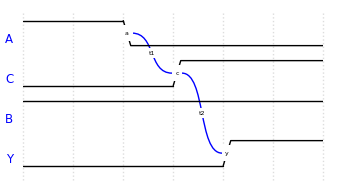

In [2]:
filename="wave_example_delay"
with schemdraw.Drawing() as d:
    d += logic.TimingDiagram.from_json('''
{ signal: [
{ name: "A",  wave: "1.0...", node: "..a" }, 
{ name: "C",  wave: "0..1..", node: "...c"}, 
{ name: "B",  wave: "1.....", node: ""}, 
{ name: "Y",  wave: "0...1.", node: "....y"}, 


],
config: { hscale: 1},
edge: ["a~c t1","c~y t2"]
} ''',
ygap=0.3,  grid=True, fontsize=10, nodesize=6
)    
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');


# Metastability diagrams

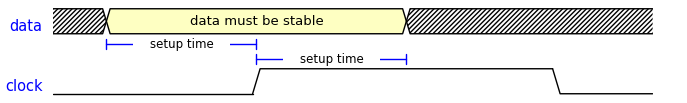

In [3]:
filename= "wave_metastability_ts_th"
with schemdraw.Drawing() as d:
    d += logic.TimingDiagram.from_json('''
{ signal: [
{ name: "data",  wave: "x3.....x....", data: ["data must be stable"], phase: 0  }, 
{ name: "clock",  wave: "0...1.....0.", node: ""}, 
],
config: { hscale: 1 },
edge : ['[0v:1]+[0v:4]{blue} setup time','[1^:4]+[1^:7] setup time']
} ''',
ygap=0.7,  grid=False, fontsize=12, nodesize=10
)    
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

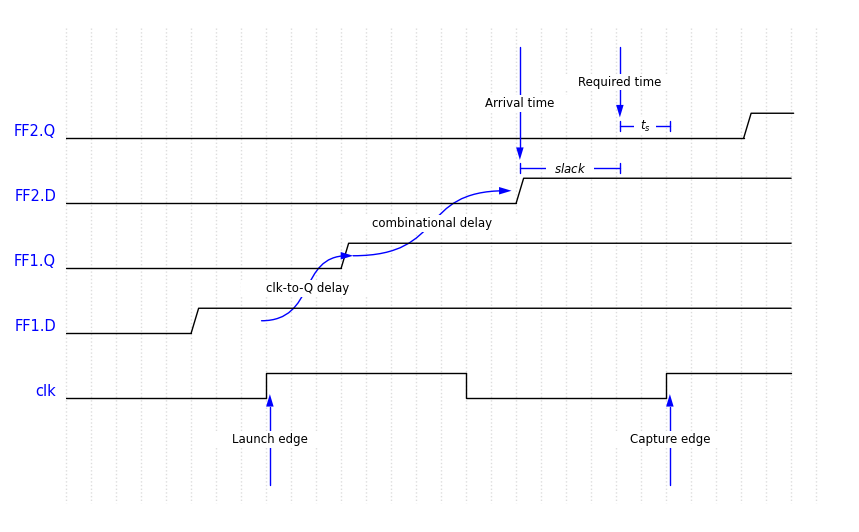

In [4]:
# Edge detectrion
filename="wave_metastability_combinational_delay"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: ""},
  { name: "FF2.Q",  wave: "0...........................1.", phase:0.9,node:"..............."  },
  { name: "FF2.D", wave: "0.................1..........", phase:0, node:"..................C" },
  { name: "FF1.Q", wave: "0..........1.................", phase:0,node:"...........B"},
  { name: "FF1.D", wave: "0....1.......................", phase:0, node:"........D"},
  { name: "clk",  wave: "0.......h.......l.......h....",node:"........A" },
  { name: "",  wave: "" },
 
],
    config: { hscale: 0.5},
    edge: ["B~>D clk-to-Q delay","B<~C combinational delay",
             "[1:22]+[1:24] $t_s$","[^2:18]+[^2:22] $slack$", "[^0:18]->[^2:18] Arrival time",
             "[^0:22]->[1:22] Required time", "[^7:8]->[5:8] Launch edge","[^7:24]->[5:24] Capture edge",
             
    ],
    head: ["adsf"],
  }
''',
ygap=0.8, grid=True, fontsize=12, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 600 ' + filename + '.svg > ' + filename + '.png');

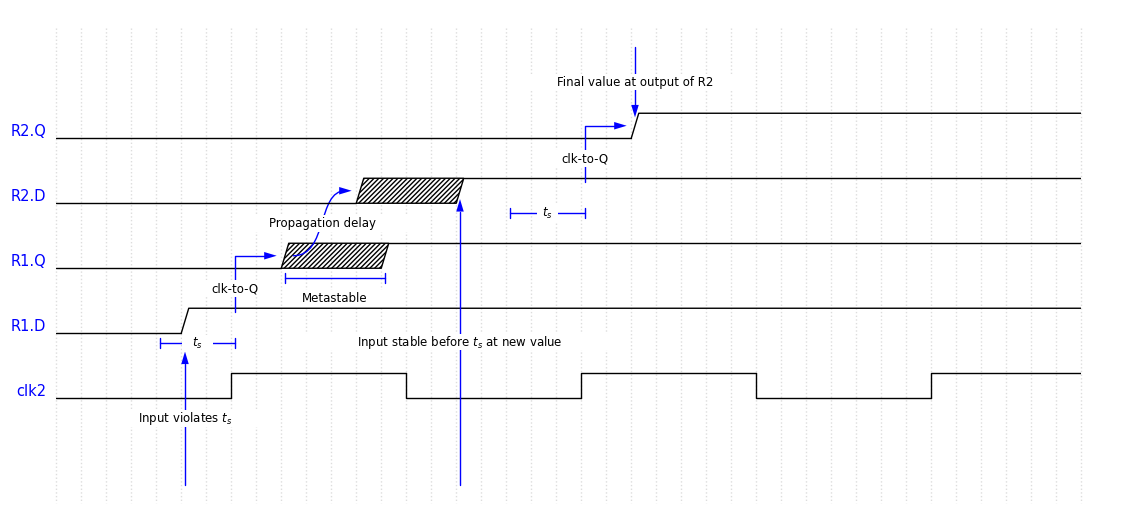

In [16]:
# Edge detectrion
filename="wave_metastability_synchronization_registers_new_value"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: ""},
  { name: "R2.Q",  wave: "0......................1.................", phase:0,node:"..............."  },
  { name: "R2.D", wave: "0...........x...1........................", phase:0,node:"...........Q"},
  { name: "R1.Q", wave: "0........x...1...........................", phase:0, node:".........B"},
  { name: "R1.D",  wave: "0....1...................................",node:".......A" },
  { name: "clk2", wave: "0......h......l......h......l......h.....", phase:0, node:"..................C" },
  
  { name: "",  wave: "" },
 
],
    config: { hscale: 0.5},
    edge: ["A<|-B clk-to-Q","[2:21]<|-[1:23] clk-to-Q",
             "[v4:4]+[v4:7] $t_s$ ","[v2:18]+[v2:21] $t_s$", 
             "[^7:5]->[v4:5] Input violates $t_s$","[^7:16]->[2:16] Input stable before $t_s$ at new value",
            "[3:9]<~[2:12] Propagation delay",
            "[^0:23]->[1:23] Final value at output of R2",
            "[v3:9]+[v3:13]",
            "[^4:9]+[^4:13] Metastable",
    ],
    head: ["adsf"],
  }
''',
ygap=0.8, grid=True, fontsize=12, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 600 ' + filename + '.svg > ' + filename + '.png');

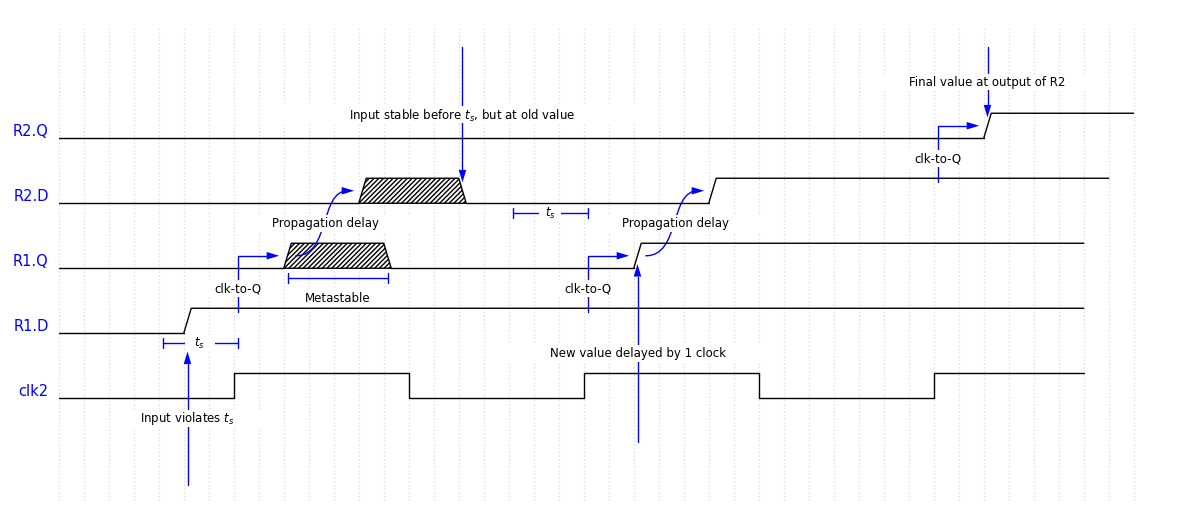

In [17]:
# Edge detectrion
filename="wave_metastability_synchronization_registers_old_value"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: ""},
  { name: "R2.Q",  wave: "0....................................1.....", phase:0,node:"..............."  },
  { name: "R2.D", wave: "0...........x...0.........1...............", phase:0,node:"...........Q"},
  { name: "R1.Q", wave: "0........x...0.........1.................", phase:0, node:".........B"},
  { name: "R1.D",  wave: "0....1...................................",node:".......A" },
  { name: "clk2", wave: "0......h......l......h......l......h.....", phase:0, node:"..................C" },
  
  { name: "",  wave: "" },
 
],
    config: { hscale: 0.5},
    edge: ["A<|-B clk-to-Q","[4:21]<|-[3:23] clk-to-Q","[2:35]<|-[1:37] clk-to-Q",
             "[v4:4]+[v4:7] $t_s$ ","[v2:18]+[v2:21] $t_s$",
             "[^7:5]->[v4:5] Input violates $t_s$","[^0:16]->[2:16] Input stable before $t_s$, but at old value",
             "[6:23]->[3:23] New value delayed by 1 clock",
            "[3:9]<~[2:12] Propagation delay",
             "[3:23]<~[2:26] Propagation delay",
            "[^0:37]->[1:37] Final value at output of R2",
                        "[v3:9]+[v3:13]",
            "[^4:9]+[^4:13] Metastable",
    ],
    head: ["adsf"],
  }
''',
ygap=0.8, grid=True, fontsize=12, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 600 ' + filename + '.svg > ' + filename + '.png');

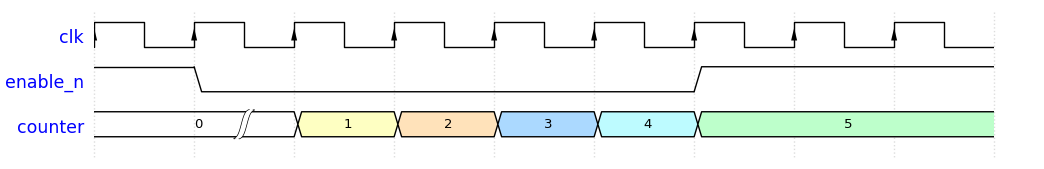

In [20]:
# Edge detectrion
filename="wave_enable_counter"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: "clk",  wave: "P........" },
  { name: "enable_n",  wave: "10....1.."  },
  { name: "counter", wave: "2|34567..", data: ["0","1","2","3","4","5"]}
],
    config: { hscale: 2 }
  }
''',
ygap=0.4, grid=True, fontsize=14, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

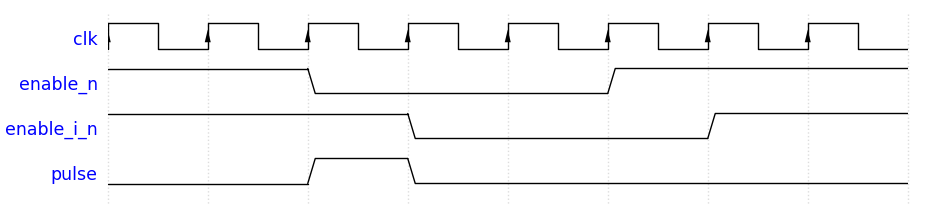

In [8]:
# Edge detectrion
filename="wave_pulse_generator"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: "clk",  wave: "P......." },
  { name: "enable_n",  wave: "1.0..1.."  },
  { name: "enable_i_n", wave: "1..0..1." },
  { name: "pulse", wave: "0.10...." },

],
    config: { hscale: 2 }
  }
''',
ygap=0.4, grid=True, fontsize=14, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

In [9]:
import wavedrom
svg = wavedrom.render("""
{ "signal": [
 { "name": "CK",   "wave": "P.......",                                              "period": 2  },
 { "name": "CMD",  "wave": "x.3x=x4x=x=x=x=x", "data": "RAS NOP CAS NOP NOP NOP NOP", "phase": 0.5 },
 { "name": "ADDR", "wave": "x.=x..=x........", "data": "ROW COL",                     "phase": 0.5 },
 { "name": "DQS",  "wave": "z.......0.1010z." },
 { "name": "DQ",   "wave": "z.........5555z.", "data": "D0 D1 D2 D3" }
],
config: { hscale: 1 },
}""")

svg.saveas("demo1.svg")

AttributeError: module 'wavedrom' has no attribute 'render'

In [10]:
svg2 = wavedrom.render("""
{
"reg": [
 {bits: 8,  name: 'RX DATA', attr: ['Bits 7:0']},
],config:{bits: 8}

}
""")
svg2.saveas("bitfield.svg")
svg2

AttributeError: module 'wavedrom' has no attribute 'render'

In [65]:
from wavedrom import renderWaveForm

ImportError: cannot import name 'renderWaveForm' from 'wavedrom' (unknown location)

# state machines

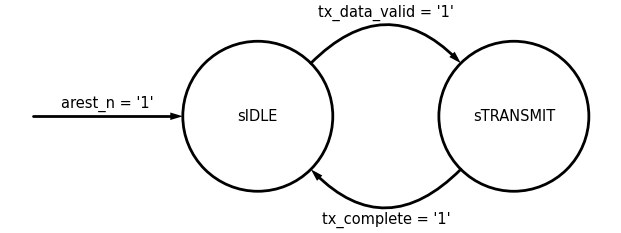

In [11]:
# Edge detectrion
filename="fsm_tx_uart_sd"

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    delta=4
    d += elm.Arrow().length(3).label("arest_n = '1'")
    d += (idle := flow.State(r=1.5).anchor("W").label("sIDLE"))
    d += elm.Arc2(arrow="->").at(idle.NE).label("tx_data_valid = '1'")
    d += (transmit := flow.State(r=1.5).anchor("NW").label('sTRANSMIT'))
    d += elm.Arc2(arrow="->").at(transmit.SW).to(idle.SE).label("tx_complete = '1'")
    d.save(filename+".svg")
    os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

In [12]:

# Edge detectrion
filename="fsm_tx_uart_asm"

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    d += (idle := flow.Box().label("sIDLE\n \n tx_busy = '0' \n tx_complete = '0' "))
    d += flow.Arrow().down(.at(idle.S)
    d += (idle_d := flow.Decision())
    d.save(filename+".svg")

    os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

SyntaxError: invalid syntax (2473620879.py, line 7)

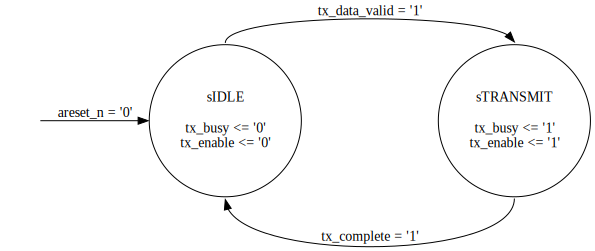

In [13]:
import graphviz

filename = "fsm_tx_uart_sd"
dot = graphviz.Digraph(filename, filename=filename+".gv", format="svg")
dot.attr(rankdir="LR")
dot.attr('node', shape="circle")
dot.node("a",label="",color="white")
dot.node("sIDLE", label="sIDLE\n\n tx_busy <= '0'\n tx_enable <= '0'")
dot.node("sTRANSMIT",label="sTRANSMIT\n\n tx_busy <= '1'\n tx_enable <= '1'")

dot.edge("a:e","sIDLE:w",label="areset_n = '0'")
dot.edge("sIDLE:n","sTRANSMIT:n",label="tx_data_valid = '1'")
dot.edge("sTRANSMIT:s","sIDLE:s",label="tx_complete = '1'")


dot.render()
os.system('rsvg-convert --dpi-x 300 --dpi-y 300 ' + filename + '.gv.svg > ' + filename + '.gv.png');
dot


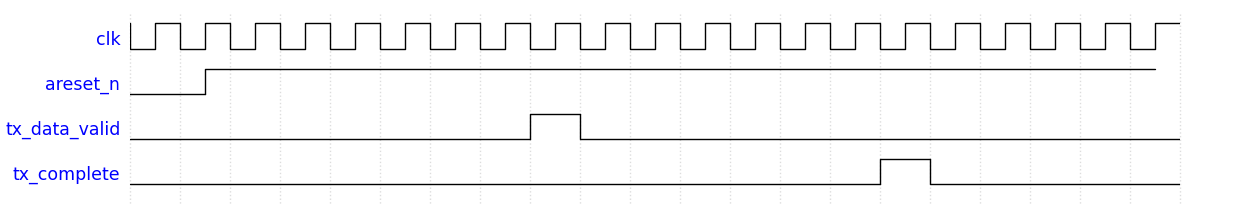

In [14]:
# Edge detectrion
filename="wave_fsm_tx_uart_test_condition"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{ signal: [
  { name: "clk",  wave: "n...................." },
  { name: "areset_n",  wave: "0.1..................", phase:0.5  },
  { name: "tx_data_valid", wave: "0.......10..........." },
  { name: "tx_complete", wave: "0..............10...." },

],
    config: { hscale: 1 }
  }
''',
ygap=0.4, grid=True, fontsize=14, nodesize=10, risetime=0
)
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');

# UART

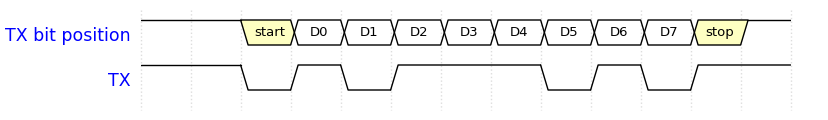

In [15]:
# Edge detectrion
filename="wave_project_uart_tx_example"

with schemdraw.Drawing() as d:
    d+= logic.TimingDiagram.from_json('''
{
    signal: [

        { name: 'TX bit position', wave: '1.32222222231', data: ['start', 'D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'stop'] },
        { name: 'TX', wave: '1.0101..0101.' },
    ],

    config: { hscale: 1 }

}
''',
ygap=0.4, grid=True, fontsize=14, nodesize=10
)
d.save(filename+".svg")
os.system('rsvg-convert -h 400 ' + filename + '.svg > ' + filename + '.png');